# Homework 2

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import numpy as np

In [30]:
#fuction that converts unix timestamps into datetime
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [9]:
df = pd.read_csv('steam_reviews.csv', header = 'infer', nrows = 100000, parse_dates=['timestamp_created','timestamp_updated','author.last_played'], date_parser = dateparse)
df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,292030,The Witcher 3: Wild Hunt,69870073,english,"""Witchers were made to kill monsters. It doesn...",2020-05-27 03:15:22,2020-08-05 06:20:39,True,0,...,True,False,False,76561198157432426,58,3,7685.0,0.0,5827.0,2020-09-28 17:18:08
99996,99996,292030,The Witcher 3: Wild Hunt,69869984,english,Awesome game 100%,2020-05-27 03:12:22,2020-05-27 03:12:22,True,0,...,True,False,False,76561198316783809,28,4,6743.0,0.0,4572.0,2020-10-27 01:12:58
99997,99997,292030,The Witcher 3: Wild Hunt,69869740,schinese,优秀,2020-05-27 03:04:56,2020-05-27 03:04:56,True,0,...,True,False,False,76561199053134442,5,2,407.0,0.0,191.0,2020-06-10 12:42:29
99998,99998,292030,The Witcher 3: Wild Hunt,69869693,english,Best game ever made.,2020-05-27 03:03:39,2020-05-27 03:03:39,True,0,...,True,False,False,76561197960918235,45,2,8162.0,14.0,7332.0,2021-01-19 20:43:35


### [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.



1. Starting with a dimension reduction of the original dataset, we consider 100000 rows (out of 21 million), to do some basic statistics and understand the data we are dealing with. 

In [10]:
df.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [11]:
len(df.columns)

23

### Dataset consist of 23 columns:
1. app_id – the application unique identification number
2. app_name – the name of the game
3. review_id – unique identity of review
4. language – language used in review
5. review – the actual review
6. timestamp_created – date the review was created (unixtimestamp)
7. timestamp_updated – date the review was last updated (unix timestamp)
8. recommended – true means it was a positive recommendation
9. votes_helpful – the number of users that found this review helpful
10. votes_funny – the number of users that found this review funny
11. weighted_vote_score – helpfulness score
12. comment_count – number of comments posted on this review
13. steam_purchase – true if the user purchased the game on Steam
14. received_for_free – true if the user checked a box saying they got the app for free
15. written_during_early_access – true if the user posted this review while the game was in Early Access
16. Author fields:
17. steamid – the user’s SteamID
18. num_games_owned – number of games owned by the user
19. num_reviews – number of reviews written by the user
20. playtime_forever – lifetime playtime tracked in this app
21. playtime_last_two_weeks – playtime tracked in the past two weeks for this app
22. playtime_at_review – playtime when the review was written
23. last_played – time for when the user last played

### [RQ2] Let's explore the dataset by finding simple insights into the reviews. 
Plot the number of reviews for each application in descending order. 
What applications have the best Weighted Vote Score? 
Which applications have the most and the least recommendations? 
How many of these applications were purchased, and how many were given for free?

In [12]:
df_app = df.groupby('app_id')
df['app_name'].value_counts()

The Witcher 3: Wild Hunt    100000
Name: app_name, dtype: int64

For 292030 we have 100000 reviews


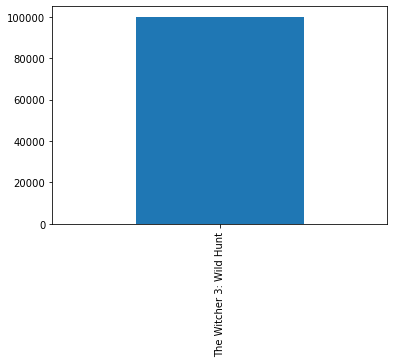

In [13]:
#2.1
for app_id, frame in df.groupby('app_id'):
    print(f'For {app_id} we have {len(frame)} reviews')
    
df['app_name'].value_counts().plot.bar()

In [14]:
#2.2
#app_wvs = df['app_id','weighted_vote_score']
#for app_id, wvs in app_wvs:
    #if wvs == max(df['weighted_vote_score']):
       # print(app_id)
    

In [15]:
max(df['weighted_vote_score'])

0.98616224527359

### [RQ3] Now it's important to understand the preferred time to do reviews.

What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

In [16]:
time_intervals = pd.read_excel('time_interval.xlsx')
time_intervals

,Initial time,Final time
0,06:00:00,10:59:59
1,11:00:00,13:59:59
2,14:00:00,16:59:59
3,17:00:00,19:59:59
4,20:00:00,23:59:59
5,00:00:00,02:59:59
6,03:00:00,05:59:59


In [17]:
# creo un dataframe con il tempo in datetime e la review id
c = pd.DataFrame(df['timestamp_created'])
c['new_date'] = [d.date() for d in df['timestamp_created']]
c['new_time'] = [d.time() for d in df['timestamp_created']]
c['new_time']

0        06:00:29
1        05:50:30
2        05:46:40
3        05:32:50
4        05:23:47
           ...   
99995    03:15:22
99996    03:12:22
99997    03:04:56
99998    03:03:39
99999    02:59:50
Name: new_time, Length: 100000, dtype: object

remember than a record corresponds to a review

In [18]:
init = list(time_intervals['Initial time'])
final = list(time_intervals['Final time'])
list_time_intervals = []
for i in range(len(init)):
    for j in range(len(final)):
        if i == j:
            list_time_intervals.append([init[i],final[j]])
list_time_intervals

[[datetime.time(6, 0), datetime.time(10, 59, 59)],
 [datetime.time(11, 0), datetime.time(13, 59, 59)],
 [datetime.time(14, 0), datetime.time(16, 59, 59)],
 [datetime.time(17, 0), datetime.time(19, 59, 59)],
 [datetime.time(20, 0), datetime.time(23, 59, 59)],
 [datetime.time(0, 0), datetime.time(2, 59, 59)],
 [datetime.time(3, 0), datetime.time(5, 59, 59)]]

In [25]:
def num_reviews_per_time(t_intervals):
    rev_count = {}
    for time_rev in c['new_time']:
        for i in range(len(t_intervals)):
            j = 0
            if t_intervals[i][0] <= time_rev <= t_intervals[i][1]:
                j+=1 
                rev_count[t_intervals[i][0],t_intervals[i][1]]=j
    return rev_count  

In [26]:
k = num_reviews_per_time(list_time_intervals)
k

{(datetime.time(6, 0), datetime.time(10, 59, 59)): 1,
 (datetime.time(3, 0), datetime.time(5, 59, 59)): 1,
 (datetime.time(0, 0), datetime.time(2, 59, 59)): 1,
 (datetime.time(20, 0), datetime.time(23, 59, 59)): 1,
 (datetime.time(17, 0), datetime.time(19, 59, 59)): 1,
 (datetime.time(14, 0), datetime.time(16, 59, 59)): 1,
 (datetime.time(11, 0), datetime.time(13, 59, 59)): 1}

In [27]:
review_time = list(num_reviews_per_time(list_time_intervals).values())
lb = [list_time_intervals[i][0] for i in range(len(list_time_intervals))]
ub = [list_time_intervals[i][1] for i in range(len(list_time_intervals))]
review_time

[1, 1, 1, 1, 1, 1, 1]

In [28]:
rev_int = pd.DataFrame(index = [lb,ub], columns = ['count'])
j = list(k.values())
rev_int['count'] = j
rev_int

,,count
06:00:00,10:59:59,1
11:00:00,13:59:59,1
14:00:00,16:59:59,1
17:00:00,19:59:59,1
20:00:00,23:59:59,1
00:00:00,02:59:59,1
03:00:00,05:59:59,1


Text(0, 0.5, 'reviews per interval')

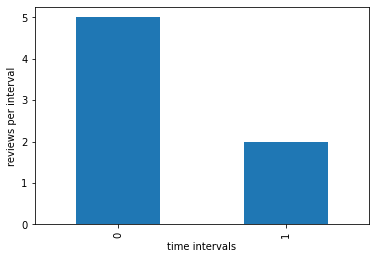

In [49]:
rev_int['count'].value_counts().plot.bar()
plt.xlabel("time intervals")
plt.ylabel('reviews per interval')

### [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

What are the top 3 languages used to review applications?
Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?